In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./data/weather.csv')

In [3]:
data.head()

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0


In [7]:
data.columns

Index(['Unnamed: 0', 'tmax', 'tmin', 'rain', 'tmax_tomorrow'], dtype='object')

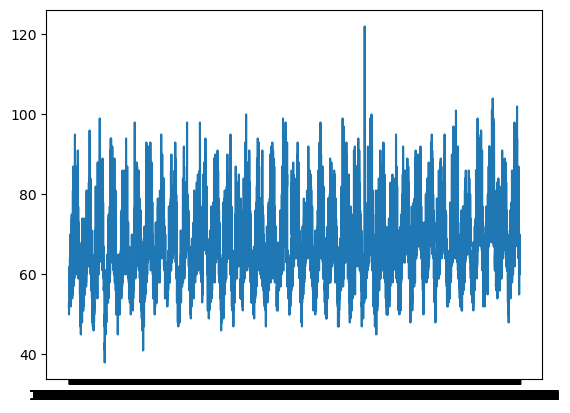

In [14]:
plt.plot(data['Unnamed: 0'], data['tmax_tomorrow'])

In [15]:
data.shape

(13509, 5)

In [21]:
np.random.seed(0)

i_weight = np.random.rand(1,2)
h_weight = np.random.rand(2,2)
o_weight = np.random.rand(2,1)

temps = data['tmax'].tail(5).to_numpy()
temps

array([62., 67., 66., 70., 62.])

In [22]:
x0 = temps[0].reshape(1,1)
x1 = temps[1].reshape(1,1)
x2 = temps[2].reshape(1,1)
x3 = temps[3].reshape(1,1)
x4 = temps[4].reshape(1,1)

In [23]:
print(x0, x1, x2, x3, x4)

[[62.]] [[67.]] [[66.]] [[70.]] [[62.]]


In [25]:
#input first multiplied by initial weight
xi_0 = x0@i_weight
xi_0

array([[34.02643724, 44.34174072]])

In [26]:
#as we donot have previous input layer, we proceed with xi_0 only
xh_0 = np.maximum(0, xi_0)

In [27]:
xo_0 = xh_0 @ o_weight
xo_0

array([[54.43230096]])

In [31]:
#nn for second input
xi_1 = x1@ i_weight
print('xi_1: {xi_1}')

xh= xh_0 @ h_weight
xh_1 = np.maximum(0, xh+xi_1)
print(f'xh_1: {xh_1}')

xo_1 = xh_1@ o_weight
print(f'xo_1 {xo_1}')

xh_1: [[76.06598622 95.09819027]]
xo_1 [[118.09150129]]


In [33]:
#nn for third input
xi_2 = x2@ i_weight
print(f'xi_2: {xi_2}')
xh = xh_1@h_weight
xh_2 = np.maximum(0, xh+xi_2)

xo_2 = xh_2@o_weight
print(f'xo_2: {xo_2}')

xi_2: [[36.22169126 47.20249818]]
xo_2: [[187.37428918]]


In [34]:
#nn for forth input
xi_3 = x3@i_weight
print(f'xi_3: {xi_3}')
xh = xh_2@h_weight
xh_3 = np.maximum(0, xh+xi_3)

xo_3 = xh_3@o_weight
print(f'xo_3 : {xo_3}')

xi_3: [[38.41694527 50.06325565]]
xo_3 : [[267.448167]]


In [35]:
#nn for fifth input
xi_4 = x4@i_weight
print(f'xi_4 : {xi_4}')

xh = xh_3@h_weight
xh_4 = np.maximum(0, xh+xi_4)

xo_4 = xh_4@o_weight
print(f'xo_4 : {xo_4}')

xi_4 : [[34.02643724 44.34174072]]
xo_4 : [[348.8684802]]


In [37]:
# as we notice that the xh's values continously keep on increasing as we are using ReLU activation function. However, the TanH function can help to some extent

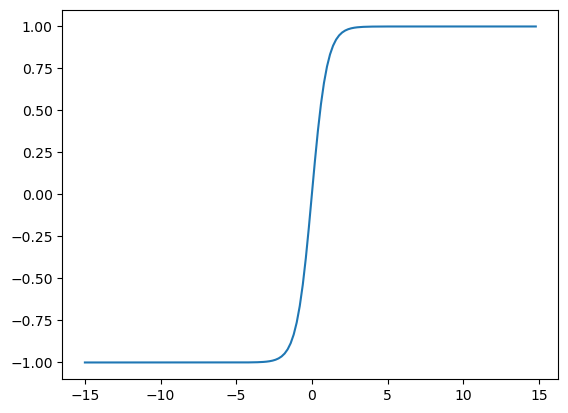

In [39]:
#TanH activation fucntion acomodates all the provided x values outputs in between positive one and negative one.
sample_temps = np.arange(-15,15, 0.2)
plt.plot(sample_temps, np.tanh(sample_temps))

In [40]:
# Now performing the forward pass step using TanH function

In [52]:
#initializing weights and bias
np.random.seed(0)
i_weight = np.random.rand(1,5)/5-0.1
h_weight = np.random.rand(5,5)/5-0.1
h_bias = np.random.rand(1,5)/5-0.1

o_weight = np.random.rand(5,1)*50
o_bias = np.random.rand(1,1)

In [59]:
outputs = np.zeros(3)
hiddens = np.zeros((3,5))
prev_hidden = None
sequence = data['tmax'].tail(3).to_numpy()
for i in range(3):
    x = sequence[i].reshape(1,1)

    xi = x@i_weight
    if prev_hidden is None:
        xh = xi
    else:
        xh = xi+prev_hidden @h_weight +h_bias
    
    xh = np.tanh(xh)
    prev_hidden = xh
    hiddens[i,] = xh

    xo = xh@o_weight +o_bias
    outputs[i] = xo
print(f'Outputs: {outputs}')
print(f'Hiddens { hiddens}')

Outputs: [74.31470595 80.66149404 77.67852446]
Hiddens [[ 0.56784618  0.99320288  0.87557333  0.53166114 -0.76483255]
 [ 0.58366756  0.99568651  0.90034879  0.69338529 -0.84149203]
 [ 0.5383306   0.99164251  0.86287584  0.66091071 -0.80543591]]


In [48]:
sequence

array([66., 70., 62.])